# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

### Generate the Cities List by Using the `citipy` Library

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url =  f'https://api.openweathermap.org/data/2.5/weather?q={cities}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | uturoa
Processing Record 5 of Set 1 | lagoa
Processing Record 6 of Set 1 | manokwari
Processing Record 7 of Set 1 | kasongo-lunda
Processing Record 8 of Set 1 | constantia
Processing Record 9 of Set 1 | island harbour
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | arys
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | constitucion
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | ust-nera
Processing Record 20 of Set 1 | lihue
Processing Record 21 of Set 1 | chonchi
Processing Record 22 of Set 1 | botshabelo
Processing Record 23 of Se

Processing Record 40 of Set 4 | yeed
Processing Record 41 of Set 4 | happy valley-goose bay
Processing Record 42 of Set 4 | nemuro
Processing Record 43 of Set 4 | ebon
Processing Record 44 of Set 4 | matoury
Processing Record 45 of Set 4 | sinabang
Processing Record 46 of Set 4 | kabarnet
Processing Record 47 of Set 4 | port elizabeth
Processing Record 48 of Set 4 | saldanha
Processing Record 49 of Set 4 | margaret river
Processing Record 0 of Set 5 | tazacorte
Processing Record 1 of Set 5 | sonsorol village
City not found. Skipping...
Processing Record 2 of Set 5 | kokpekty
Processing Record 3 of Set 5 | juneau
Processing Record 4 of Set 5 | tuy hoa
Processing Record 5 of Set 5 | jaguaribe
Processing Record 6 of Set 5 | sur
Processing Record 7 of Set 5 | dunedin
Processing Record 8 of Set 5 | susuman
Processing Record 9 of Set 5 | east london
Processing Record 10 of Set 5 | la'ie
Processing Record 11 of Set 5 | mertoyudan
Processing Record 12 of Set 5 | al kharijah
Processing Record 1

Processing Record 33 of Set 8 | kundiawa
Processing Record 34 of Set 8 | taulaga
Processing Record 35 of Set 8 | shingu
Processing Record 36 of Set 8 | katsuura
Processing Record 37 of Set 8 | taroa
Processing Record 38 of Set 8 | dongning
Processing Record 39 of Set 8 | cable beach
City not found. Skipping...
Processing Record 40 of Set 8 | kill devil hills
Processing Record 41 of Set 8 | ulanhot
Processing Record 42 of Set 8 | kataragama
City not found. Skipping...
Processing Record 43 of Set 8 | taltal
Processing Record 44 of Set 8 | ostashkov
Processing Record 45 of Set 8 | remire-montjoly
Processing Record 46 of Set 8 | hassi messaoud
Processing Record 47 of Set 8 | petrolina
Processing Record 48 of Set 8 | shibirghan
Processing Record 49 of Set 8 | los angeles
Processing Record 0 of Set 9 | mezgor'e
City not found. Skipping...
Processing Record 1 of Set 9 | magadan
Processing Record 2 of Set 9 | nar'yan-mar
Processing Record 3 of Set 9 | adh dhibiyah
City not found. Skipping...
P

Processing Record 21 of Set 12 | fort stockton
Processing Record 22 of Set 12 | puerto deseado
Processing Record 23 of Set 12 | usogorsk
Processing Record 24 of Set 12 | maintirano
Processing Record 25 of Set 12 | tulum
Processing Record 26 of Set 12 | lepsy
Processing Record 27 of Set 12 | marsa alam
Processing Record 28 of Set 12 | dongkan
Processing Record 29 of Set 12 | jorpeland
Processing Record 30 of Set 12 | vilhena
Processing Record 31 of Set 12 | ducheng
Processing Record 32 of Set 12 | tres lagoas
Processing Record 33 of Set 12 | touros
Processing Record 34 of Set 12 | krasnyy kholm
Processing Record 35 of Set 12 | santiago de cuba
Processing Record 36 of Set 12 | kaiapoi
Processing Record 37 of Set 12 | rio gallegos
Processing Record 38 of Set 12 | pustoshka
Processing Record 39 of Set 12 | nanzhou
Processing Record 40 of Set 12 | mabaruma
Processing Record 41 of Set 12 | gainesville
Processing Record 42 of Set 12 | del rio
Processing Record 43 of Set 12 | baruun-urt
Proces

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,-1.05,82,16,4.45,GS,1695762221
1,olonkinbyen,70.9221,-8.7187,4.00,82,67,6.98,SJ,1695762220
2,adamstown,-25.0660,-130.1015,20.98,70,70,7.54,PN,1695762220
3,uturoa,-16.7333,-151.4333,25.81,78,42,6.77,PF,1695762283
4,lagoa,39.0500,-27.9833,20.67,73,100,9.11,PT,1695762283


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-1.05,82,16,4.45,GS,1695762221
1,olonkinbyen,70.9221,-8.7187,4.00,82,67,6.98,SJ,1695762220
2,adamstown,-25.0660,-130.1015,20.98,70,70,7.54,PN,1695762220
3,uturoa,-16.7333,-151.4333,25.81,78,42,6.77,PF,1695762283
4,lagoa,39.0500,-27.9833,20.67,73,100,9.11,PT,1695762283


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

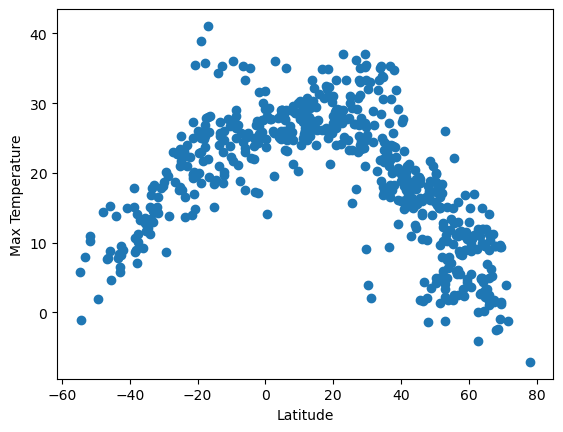

In [19]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("../output_data/rsFig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

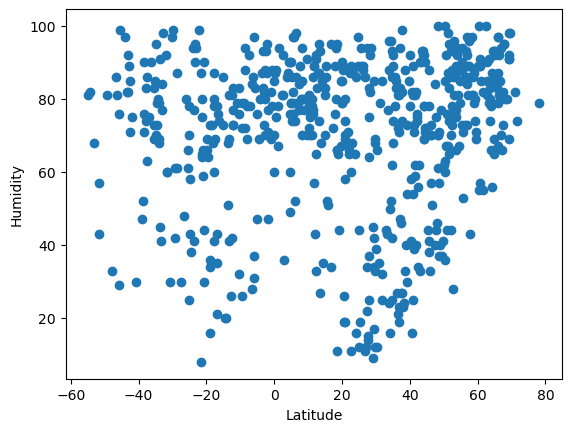

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../output_data/rsFig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

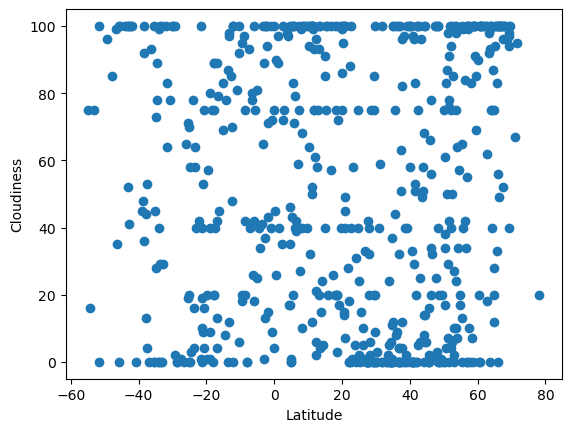

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("../output_data/rsFig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

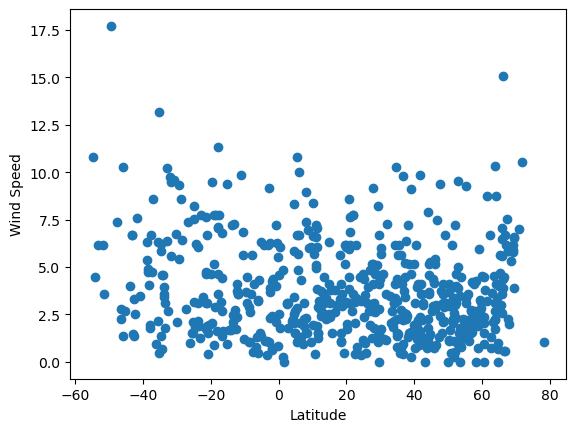

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../output_data/rsFig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,olonkinbyen,70.9221,-8.7187,4.00,82,67,6.98,SJ,1695762220
4,lagoa,39.0500,-27.9833,20.67,73,100,9.11,PT,1695762283
7,constantia,44.1833,28.6500,20.39,69,14,7.92,RO,1695762284
8,island harbour,50.7240,-1.2758,17.74,92,83,0.45,GB,1695762284
11,arys,42.4252,68.7950,17.12,34,5,2.23,KZ,1695762284


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']< 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-1.05,82,16,4.45,GS,1695762221
2,adamstown,-25.0660,-130.1015,20.98,70,70,7.54,PN,1695762220
3,uturoa,-16.7333,-151.4333,25.81,78,42,6.77,PF,1695762283
5,manokwari,-0.8667,134.0833,25.86,82,100,2.08,ID,1695762283
6,kasongo-lunda,-6.4667,16.8167,24.40,84,80,1.29,CD,1695762284


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.802502130997722


Text(0.5, 1.0, 'Latitude vs. Temperature in Northern Hemisphere')

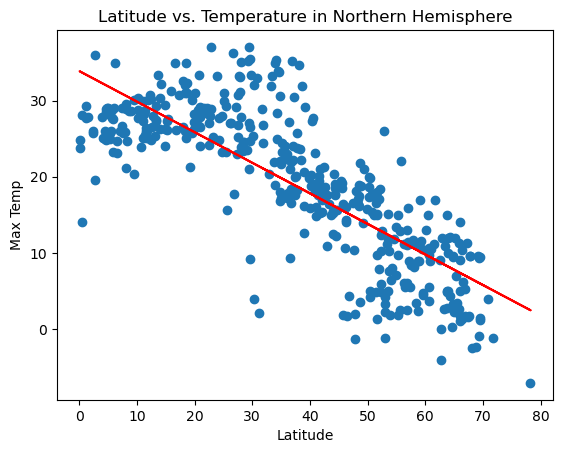

In [41]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature in Northern Hemisphere")



The r-value is: 0.7933539715287449


Text(0.5, 1.0, 'Latitude vs. Temperature in Southern Hemisphere')

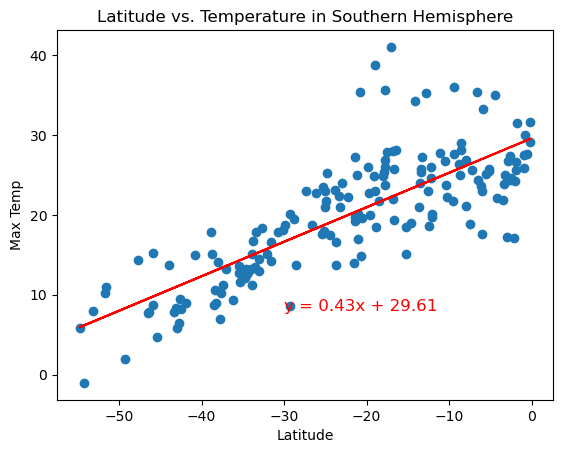

In [42]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 8))

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature in Southern Hemisphere")

**Discussion about the linear relationship:** 

The relationship with temperature in the Northern Hempishere has a strong negative correlation, with a coefficient of -0.802502130997722. The temperature in the Southern Hempishere has a strong positive correlation, with a coefficient of 0.7933539715287449.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.11009758623158668


Text(0.5, 1.0, 'Latitude vs. Humidity in Northern Hemisphere')

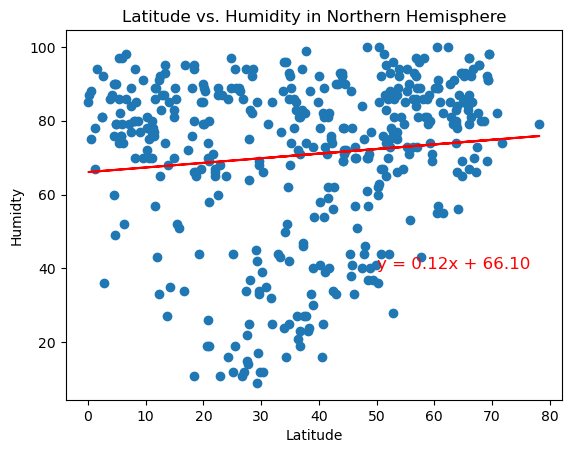

In [46]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 40))

plt.xlabel("Latitude")
plt.ylabel("Humidty")
plt.title("Latitude vs. Humidity in Northern Hemisphere")

The r-value is: -0.022867977240744512


Text(0.5, 1.0, 'Latitude vs. Humidity in Southern Hemisphere')

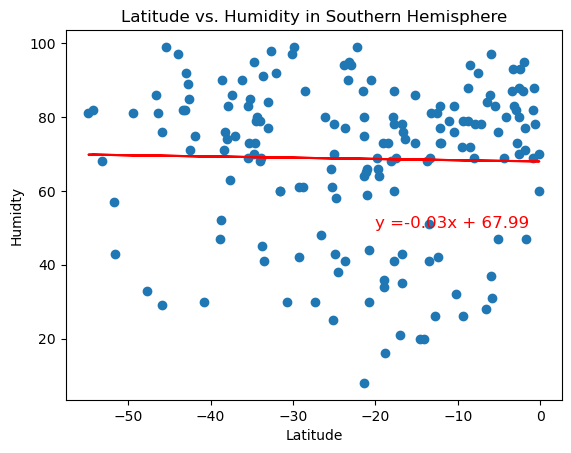

In [47]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-20, 50))

plt.xlabel("Latitude")
plt.ylabel("Humidty")
plt.title("Latitude vs. Humidity in Southern Hemisphere")

**Discussion about the linear relationship:** 

In both the Nothern and Southern Hemispheres, there is little relationship between latitude and humidity. However, the Nothern Hemisphere still shows a slight positive correlation, with a r-value of  0.11009758623158668. The Southern Hemisphere shows a slight negative correlation, with a r-value of -0.022867977240744512.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07246629188940737


Text(0.5, 1.0, 'Latitude vs. Cloudiness in Northern Hemisphere')

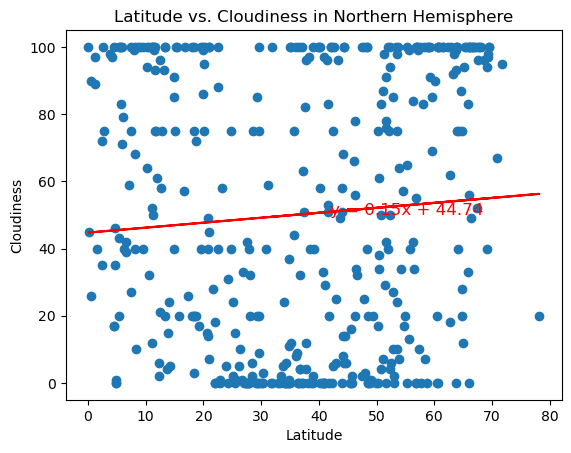

In [48]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (42, 50))

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness in Northern Hemisphere")

The r-value is: -0.034599780360878206


Text(0.5, 1.0, 'Latitude vs. Cloudiness in Southern Hemisphere')

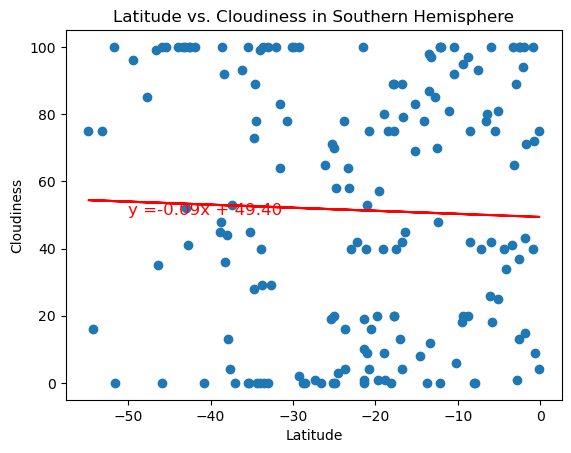

In [49]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 50))

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness in Southern Hemisphere")

**Discussion about the linear relationship:** 

The latitude vs cloudiness in the Northern and Southern Hemisphere is more scattered, where it shows little correlation between the two. There is still a slight positive correlation in the Northern hemisphere and a slight negative correlation in the Southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.01955065602003028


Text(0.5, 1.0, 'Latitude vs. Wind Speed in Northern Hemisphere')

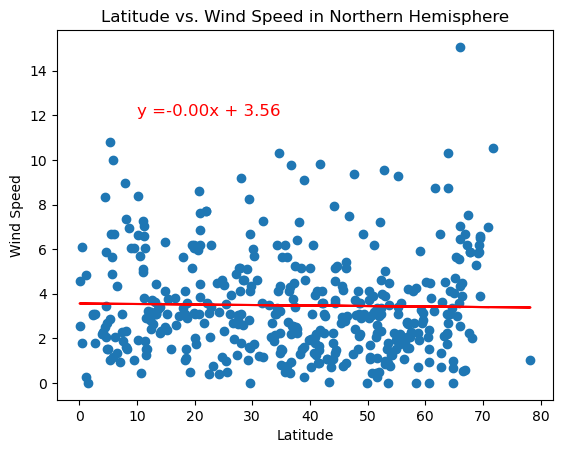

In [50]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 12))

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed in Northern Hemisphere")th

The r-value is: -0.24469154463940535


Text(0.5, 1.0, 'Latitude vs. Wind Speed in Southern Hemisphere')

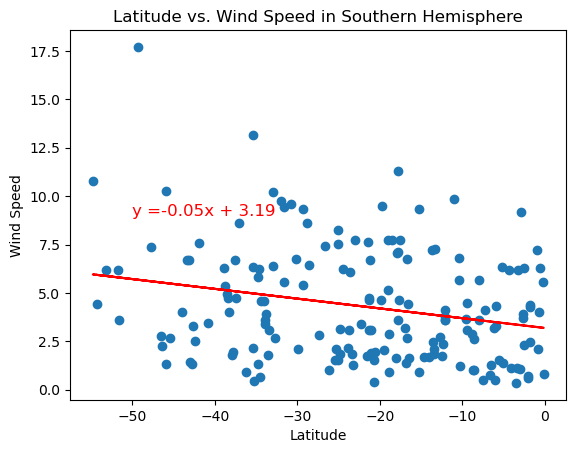

In [51]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 9))

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed in Southern Hemisphere")

**Discussion about the linear relationship:** 

In the Northern Hemisphere, there is scattered wind speed, where most of the windsppeds are relatively low. The coefficient of the Northern Hemisphere did have a negative correlation of -0.01955065602003028. The Southern hemisphere has weak negative correlation between the lattitude and winsdspeed. The r-value for the Southern Hemisphere is -0.24469154463940535.